# seaborn - Plotting with categorical data  

この資料では、以下の seaborn のチュートリアルを簡単に翻訳しつつ、使い方を紹介しています。  

[Plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html)  

[seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot) を使って、「カテゴリカル (質的) なデータの描画」を行っていきます。  
なお、seaborn.catplot 自体は下記の関数のインターフェースであり、引数 `kind` に渡される値で描画する図を選択することができます。   

Categorical scatterplots:

- [seaborn.stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot) (with kind="strip"; the default)  
- [seaborn.swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot) (with kind="swarm")  

Categorical distribution plots:

- [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) (with kind="box")  
- [seaborn.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) (with kind="violin")  
- [seaborn.boxenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot) (with kind="boxen")  

Categorical estimate plots:

- [seaborn.pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) (with kind="point")  
- [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) (with kind="bar")  
- [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) (with kind="count")  


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

## Categorical scatterplots  

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


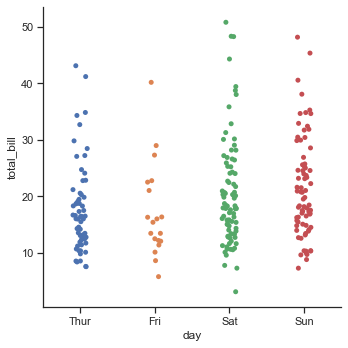

In [4]:
# カテゴリカルな曜日毎に散布図を描画
# デフォルトでは各データの重なりを緩和するために左右にずれる
# (kind="strip" がデフォルトであり、何も指定しなければこの形式となる)
sns.catplot(x="day", y="total_bill", data=tips);

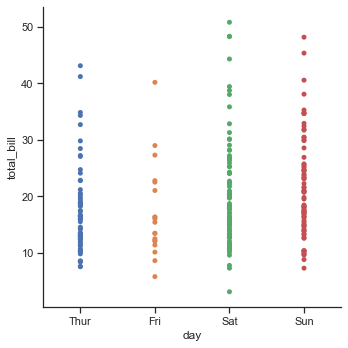

In [5]:
# 各データを一直線上に並べる場合は jitter=False
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

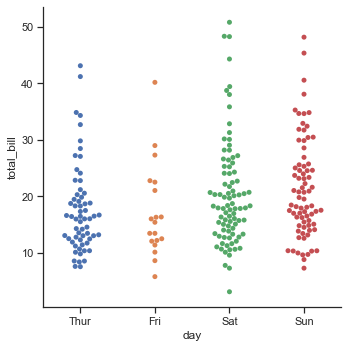

In [6]:
# kind="swarm" で各データが完全に重ならないように描画
# 図の範囲次第では重なる点も発生するかも
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips); 

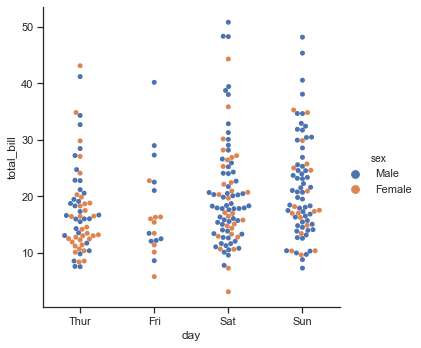

In [7]:
# hue で指定した系列のカテゴリーごとに色調を変える
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

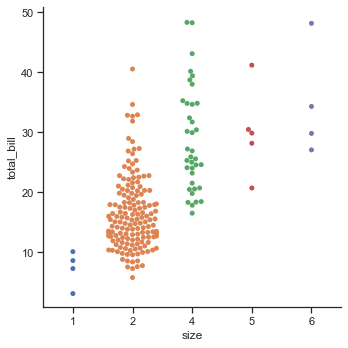

In [8]:
# x 軸の並びは渡された系列が数値 (に見える) の場合、ソートされる
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

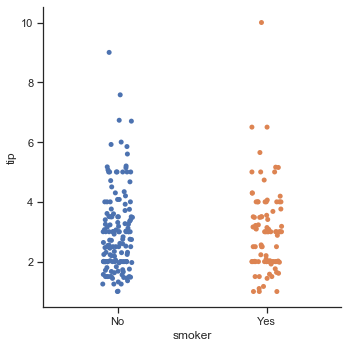

In [9]:
# order で順序を指定することができる
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

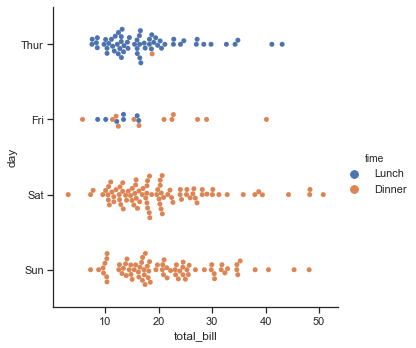

In [10]:
# y 軸にカテゴリカルな系列を与えれば…
# 数値に見えるときは上手くいかない模様
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

## Distributions of observations within categories  

### Boxplots  

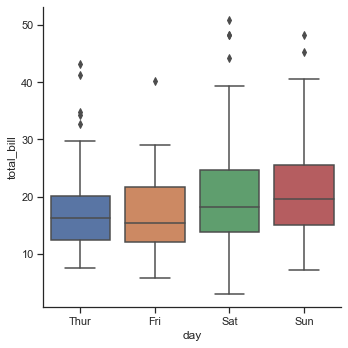

In [11]:
# kind="box" で箱ひげ図
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

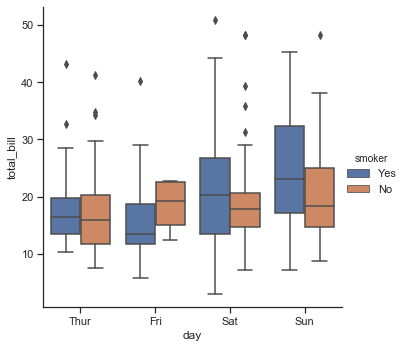

In [12]:
# お馴染みの hue でカテゴリー毎に色分け 
# x 軸系列ごとに完全に被らない程度に配置される
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

In [14]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


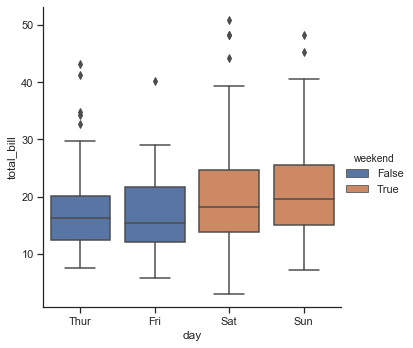

In [15]:
# この例の様に、x 軸系列の各カテゴリの中に hue で指定した系列の
# どれかひとつ存在しない場合は、dodge=False でいい感じになる
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

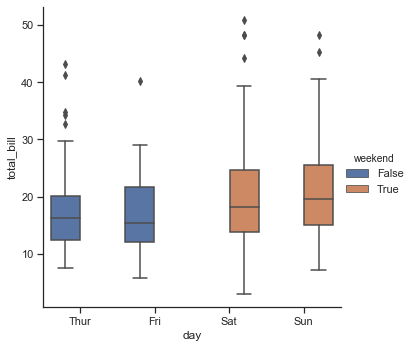

In [16]:
# dodge=False しない場合
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", data=tips);

In [17]:
# 量の多いデータセットをロード
diamonds = sns.load_dataset("diamonds")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


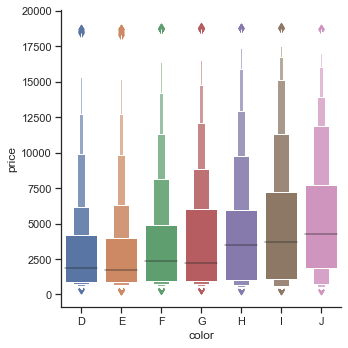

In [18]:
# 箱ひげ図の亜種 (boxenplot)
# 箱の幅が階級の度数を表している
# データ数が多い場合は単純な箱ひげ図よりもわかりやすい
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

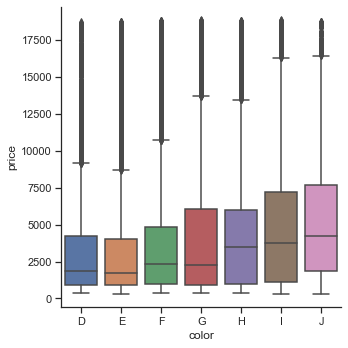

In [19]:
# 上記を単純な箱ひげ図で描画した場合
# 確かにわかりづらい…
sns.catplot(x="color", y="price", kind="box",
            data=diamonds.sort_values("color"));

### Violinplots  

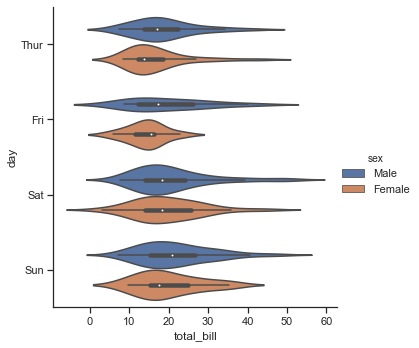

In [20]:
# バイオリンプロットの例
#　Visualizing the distribution of a dataset で
# 言及されるカーネル密度推定と箱ひげ図を組み合わせたもの
# 分布の中に複数のピークがある場合に有効
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips);

[Visualizing the distribution of a dataset](https://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial)  
[カーネル密度分布とは？ - 空間情報クラブ｜株式会社インフォマティクス](https://club.informatix.co.jp/?p=1176)  

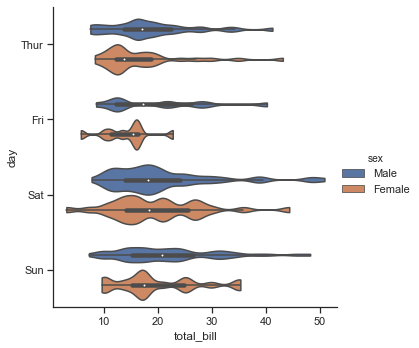

In [21]:
# バイオリンプロットには詳細なパラメータが存在し、
# 調整が難しいという側面もある…
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips);

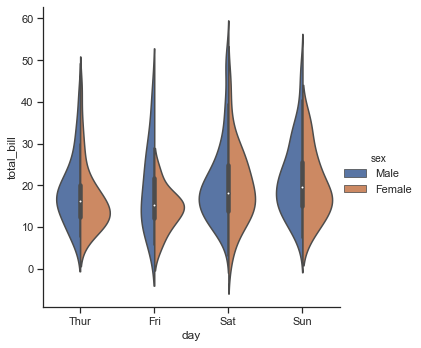

In [22]:
# fue に渡した系列が 2 つのクラスしか持たない場合は、
# split=True で下記のようにスペースを節約することができる
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

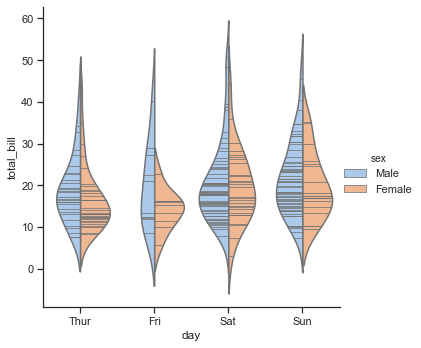

In [23]:
# 観測値をプロットする方法にはいくつかオプションがある
# 下記は inner="stick" で
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

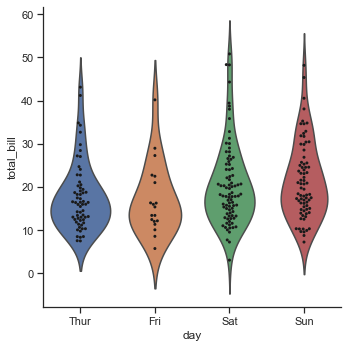

In [24]:
# バイオリンプロットの度数を非表示にし、
# sns.swarmplot を重ねて表示
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

## Statistical estimation within categories

### Bar plots  

In [27]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


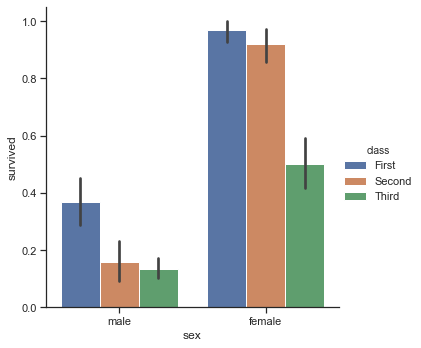

In [22]:

sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

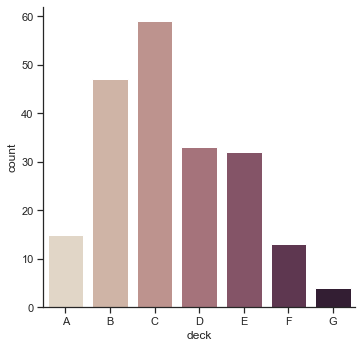

In [23]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

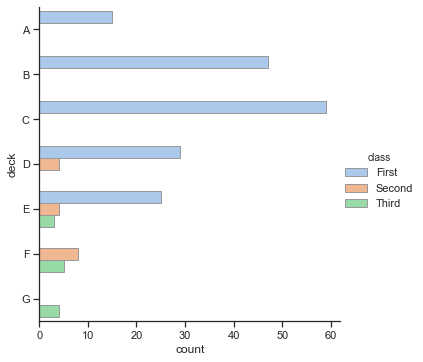

In [24]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

### Point plots  

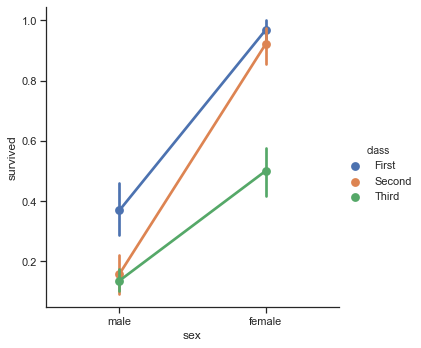

In [25]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

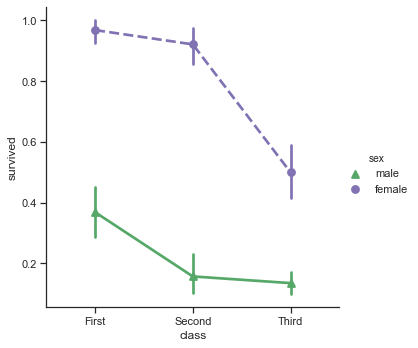

In [26]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

## Plotting “wide-form” data  

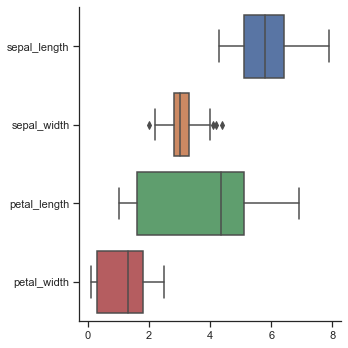

In [27]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box");

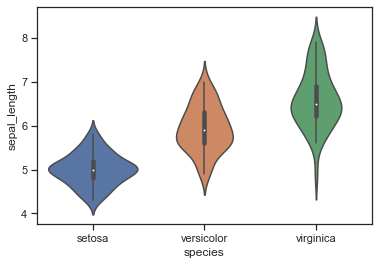

In [28]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

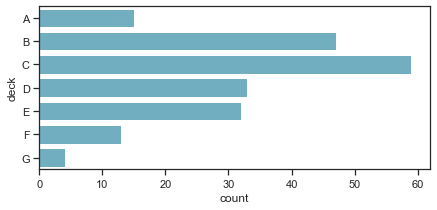

In [29]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

## Showing multiple relationships with facets  

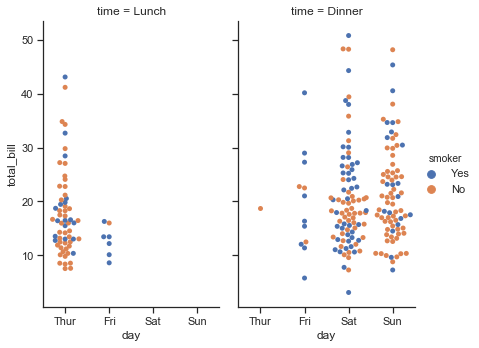

In [30]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

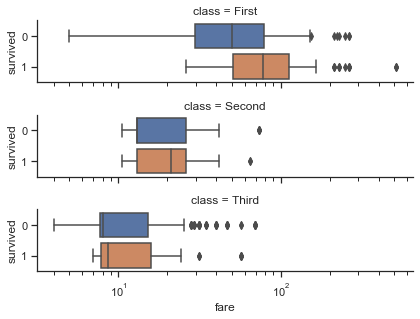

In [31]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");